In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

In [2]:
bank = pd.read_csv('data/bank/bank-full.csv',sep=';', quotechar='"').dropna()
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
feature = 'education'
bank.groupby([feature])[feature].count()

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64

In [10]:
bank.groupby(['education'])['education'].count()

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64

In [5]:
bank.groupby(['job'])['job'].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64

In [6]:
bank.groupby(['y'])['y'].count()

y
no     39922
yes     5289
Name: y, dtype: int64

In [5]:
bank_additional.groupby(['education'])['education'].count()

education
basic.4y                429
basic.6y                228
basic.9y                574
high.school             921
illiterate                1
professional.course     535
university.degree      1264
unknown                 167
Name: education, dtype: int64

In [6]:
bank_additional.groupby(['y'])['y'].count()

y
no     3668
yes     451
Name: y, dtype: int64

### Data Preparation

In [20]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline

In [16]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
### Data Tranformations needed: 
# 1. Job -> OrdinalEncoder in this order: ['entrepreneur', 'management', 'admin.', 'self-employed', 'retired', 'services', 'student', 'technician', 'blue-collar', 'housemaid', 'unemployed', 'unknown']
# 2. marital -> OnHotEncoder
# 3. education -> OrdinalEncoder in this order: ['primary', 'secondary', 'tertiary', 'unknown']
# 4. default -> OneHotEncoder
# 5. housing -> OneHotEncoder
# 6. Loan -> OneHotEncoder
# 7. contact, day, month, pdays -> Dropping these features as they are not important
# 8. poutcome -> onehotencoder 

In [70]:
### Based on the above data analysis, I have settled on the following features to use in my model: 
shortlisted_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'duration','campaign', 'previous', 'poutcome']
X = bank[shortlisted_features]
y = bank['y']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify = y, random_state=22)

In [52]:
### Let us prepare our transformer: 

transformer = make_column_transformer(
    (OneHotEncoder(drop = 'if_binary'), ['marital','default', 'housing', 'loan', 'poutcome']),
    (OrdinalEncoder(categories = [['entrepreneur', 'management', 'admin.', 'self-employed', 'retired', 'services', 'student', 'technician', 'blue-collar', 'housemaid', 'unemployed', 'unknown']]), ['job']),
    (OrdinalEncoder(categories = [['primary', 'secondary', 'tertiary', 'unknown']]), ['education']),
    remainder='passthrough')
# transformer.fit_transform(X_train)[:5]
# X_train_tx = transformer.fit_transform(X_train)
# X_test_tx = transformer.fit_transform(X_test)

In [65]:
### Function to extract column names since ORdinalEncoder does not provide the get_feature_names_out function
### Source: https://johaupt.github.io/blog/columnTransformer_feature_names.html
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [72]:
#Get the transformed feature names out
tx_feature_names = get_feature_names(transformer)
mapping = { 
    'onehotencoder__x0':'marital',
    'onehotencoder__x1':'default',   
    'onehotencoder__x2':'housing',
    'onehotencoder__x3': 'loan', 
    'onehotencoder__x4':'poutcome', 
    'ordinalencoder-1__':'', 
    'ordinalencoder-2__':'',
    'x0': shortlisted_features[0],
    'x7': shortlisted_features[7],
    'x8': shortlisted_features[8],
    'x9': shortlisted_features[9]
}

for i in range(0,len(tx_feature_names)): 
    for k, v in mapping.items():
        tx_feature_names[i] = tx_feature_names[i].replace(k, v)
        
tx_feature_names

['marital_divorced',
 'marital_married',
 'marital_single',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'job',
 'education',
 'age',
 'duration',
 'campaign',
 'previous']

### Let's test the setup with one classifier: 

#### K-Nearest Neighbors

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [55]:
knn_param_grid = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance']
}
knn_pipe = Pipeline([
    ('transformer', transformer),
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

In [57]:
%%time

knn_grid = GridSearchCV(knn_pipe, param_grid=knn_param_grid, cv=5)
knn_grid.fit(X_train, y_train)

CPU times: total: 3min 13s
Wall time: 1min 13s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['marital',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'poutcome']),
                                                                        ('ordinalencoder-1',
                                                                         OrdinalEncoder(categories=[['entrepreneur',
            

In [35]:
# Print the best parameters and score
print("Best parameters:", knn_grid.best_params_)
print("Best score:", knn_grid.best_score_)

Best parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best score: 0.8831801005277494


In [84]:
knn_predictions = knn_grid.predict(X_test)
knn_predictions

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [85]:
pos_label = 'yes'
knn_precision, knn_recall = precision_score(y_test, knn_predictions, pos_label=pos_label), recall_score(y_test, knn_predictions, pos_label=pos_label)
print(f'K Nearest Neighbors (precision, recall): ({knn_precision},{knn_recall})')

K Nearest Neighbors (precision, recall): (0.5528541226215645,0.3295526149968494)


Text(0.5, 1.0, 'K Nearest Neighbors Model')

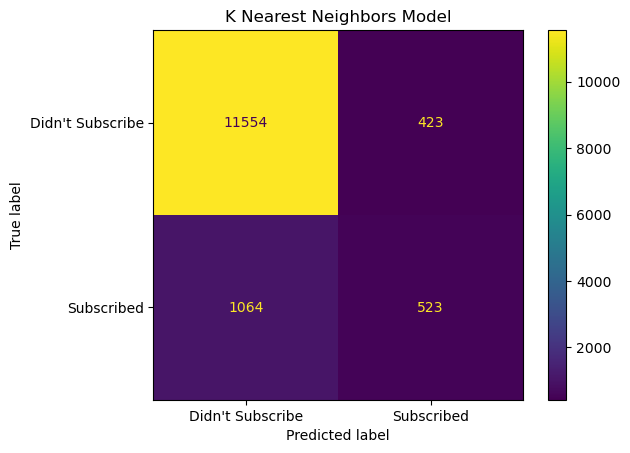

In [103]:
ConfusionMatrixDisplay.from_predictions(
    y_true = y_test, 
    y_pred = knn_predictions, 
    labels = ['no','yes'],
    display_labels=["Didn't Subscribe",'Subscribed']
)
plt.title('K Nearest Neighbors Model')

In [101]:
print(f'y_test(yes, no) :: ({list(y_test).count("yes")},{list(y_test).count("no")})')
print(f'knn_predictions(yes, no) :: ({list(knn_predictions).count("yes")},{list(knn_predictions).count("no")})')

y_test(yes, no) :: (1587,11977)
knn_predictions(yes, no) :: (946,12618)


#### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
%%time
lr_model = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100]
}
lr_grid = GridSearchCV(lr_model, param_grid, cv=5)
lr_grid.fit(X_train_tx, y_train)

CPU times: total: 22.2 s
Wall time: 3.17 s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [59]:
# Print the best parameters and score
print("Best parameters:", lr_grid.best_params_)
print("Best score:", lr_grid.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 0.8983157645652786


In [79]:
# let us get the coefficients of the features used in the best estimator
lr_feature_weights = pd.DataFrame({
    'feature': tx_feature_names,
    'weight': lr_grid.best_estimator_.coef_[0]
})
lr_feature_weights['abs_weight'] = abs(lr_feature_weights['weight'])

lr_feature_weights.sort_values(by=['abs_weight'], ascending=False)

,feature,weight,abs_weight
4,housing_yes,-1.539172,1.539172
9,poutcome_unknown,-1.132855,1.132855
8,poutcome_success,0.868394,0.868394
5,loan_yes,-0.516878,0.516878
1,marital_married,-0.437404,0.437404
6,poutcome_failure,-0.299531,0.299531
11,education,-0.239523,0.239523
2,marital_single,-0.161228,0.161228
14,campaign,-0.143848,0.143848
10,job,-0.072890,0.072890
